In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/WAZIRKAGGLE/My_datasets

/content/drive/My Drive/WAZIRKAGGLE/My_datasets


In [3]:
!ls

best_model_improved.h5	my_first_model.png		    Test_data
blurred1.bmp		my_first_model_with_shape_info.png  Train_data
HR1.bmp			restored1.bmp			    wscale2.h5


In [4]:
!pip uninstall scipy

Uninstalling scipy-1.4.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/scipy-1.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/scipy/*
Proceed (y/n)? y
  Successfully uninstalled scipy-1.4.1


In [5]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 94kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [6]:
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Activation, Input
from keras import optimizers
from keras.models import load_model
import numpy as np
import scipy.misc
import scipy.ndimage
import cv2
import math
import glob
import matplotlib.pyplot as plt
import keras

In [7]:
img_shape = (32,32,1)
input_img = Input(shape=(img_shape))
C1 = Conv2D(64,(9,9),padding='SAME',name='CONV1')(input_img)
A1 = Activation('relu', name='act1')(C1)
C2 = Conv2D(32,(1,1),padding='SAME',name='CONV2')(A1)
A2 = Activation('relu', name='act2')(C2)
C3 = Conv2D(1,(5,5),padding='SAME',name='CONV3')(A2)
A3 = Activation('relu', name='act3')(C3)
model = Model(input_img, A3)
opt = optimizers.Adam(lr=0.0003)
model.compile(optimizer=opt,loss='mean_squared_error')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
CONV1 (Conv2D)               (None, 32, 32, 64)        5248      
_________________________________________________________________
act1 (Activation)            (None, 32, 32, 64)        0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 32, 32, 32)        2080      
_________________________________________________________________
act2 (Activation)            (None, 32, 32, 32)        0         
_________________________________________________________________
CONV3 (Conv2D)               (None, 32, 32, 1)         801       
_________________________________________________________________
act3 (Activation)            (None, 32, 32, 1)        

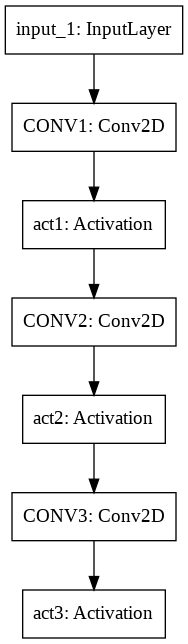

In [8]:
keras.utils.plot_model(model, 'my_first_model.png')

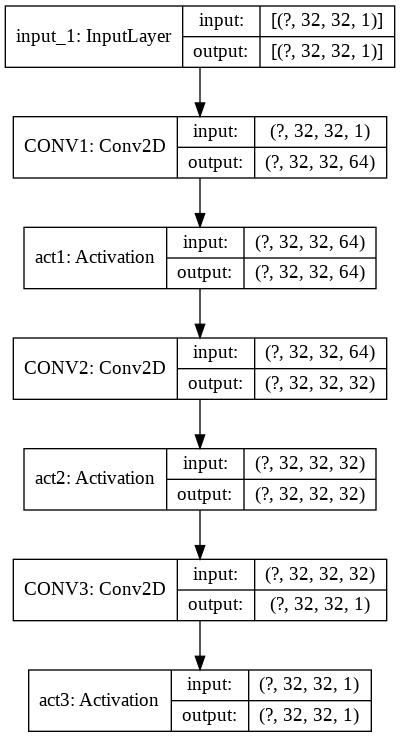

In [9]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [10]:
def modcrop(image, scale=2): #BY DEFAULT SCALE 2
    if len(image.shape) == 3:
        h, w, _ = image.shape
        h = h - np.mod(h, scale)
        w = w - np.mod(w, scale)
        image = image[0:h, 0:w, :]
    else:
        h, w = image.shape
        h = h - np.mod(h, scale)
        w = w - np.mod(w, scale)
        image = image[0:h, 0:w]
    return image

In [11]:
def create_LR(image,scale):
    label_ = modcrop(image, scale)
    label_ = label_ / 255.
    input_ = scipy.ndimage.interpolation.zoom(label_, (1./scale), prefilter=False)
    input_ = scipy.ndimage.interpolation.zoom(input_, (scale/1.), prefilter=False)
    return input_

In [12]:
path = 'Train_data/Timofte-91/Training/'
files_y = glob.glob(path + '*.*')
trainfiles = files_y[:60]             #HERE TOTAL IMAGES ARE 91 , SO FROM 91 up to 85 used for Training
valfiles = files_y[60:]               #HERE Above 85 used for Validation Set
img_size = 32
stride = 16
X_train = []
Y_train = []
X_val = []
Y_val = []

In [13]:
# Extract patch image for training
for file_y in trainfiles:
    tmp_y = scipy.misc.imread(file_y,flatten=True, mode='YCbCr').astype(np.float)
    tmp_X = create_LR(tmp_y,2) #############################################################SCALE###########
    h,w = tmp_y.shape
    for x in range(0, h-img_size+1, stride):
        for y in range(0, w-img_size+1, stride):
            sub_input = tmp_X[x:x+img_size,y:y+img_size].reshape(img_size,img_size,1)
            sub_label = tmp_y[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1)
            X_train.append(sub_input)
            Y_train.append(sub_label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Extract patch image for validation
for file_y in valfiles:
    tmp_y = scipy.misc.imread(file_y,flatten=True, mode='YCbCr').astype(np.float)
    tmp_X = create_LR(tmp_y,2)###########################################################SCALE################
    h,w = tmp_y.shape
    for x in range(0, h-img_size+1, stride):
        for y in range(0, w-img_size+1, stride):
            sub_input = tmp_X[x:x+img_size,  y:y+img_size].reshape(img_size,img_size,1) # [32 x 32]
            sub_label = tmp_y[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1) # [32 x 32]
            X_val.append(sub_input)
            Y_val.append(sub_label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [16]:
LEARN_RATE = 1.0e-4

In [17]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD

In [18]:
checkpoint = ModelCheckpoint('best_model_improved.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [19]:
model.compile(loss='mse', # Better loss function for neural networks
              optimizer=Adam(lr=LEARN_RATE), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

In [20]:
history = model.fit(X_train, Y_train,
                    batch_size = 64,
                    epochs = 500, # number of iterations
                    validation_data= (X_val, Y_val),
                    callbacks=[checkpoint],verbose=1)

Epoch 1/500
142/142 [==============================] - 2s 11ms/step - loss: 16430.3711 - accuracy: 7.6701e-05 - val_loss: 12081.5117 - val_accuracy: 2.3296e-04
Epoch 2/500
142/142 [==============================] - 1s 6ms/step - loss: 6923.6494 - accuracy: 3.7436e-05 - val_loss: 1957.5006 - val_accuracy: 2.1565e-04
Epoch 3/500
142/142 [==============================] - 1s 6ms/step - loss: 1626.7305 - accuracy: 3.7436e-05 - val_loss: 1481.9880 - val_accuracy: 2.1565e-04
Epoch 4/500
142/142 [==============================] - 1s 6ms/step - loss: 1525.2075 - accuracy: 3.7436e-05 - val_loss: 1422.0061 - val_accuracy: 2.1565e-04
Epoch 5/500
142/142 [==============================] - 1s 6ms/step - loss: 1444.5583 - accuracy: 3.7436e-05 - val_loss: 1330.6394 - val_accuracy: 2.1565e-04
Epoch 6/500
142/142 [==============================] - 1s 6ms/step - loss: 1323.3192 - accuracy: 3.7436e-05 - val_loss: 1195.9584 - val_accuracy: 2.1565e-04
Epoch 7/500
142/142 [==============================] - 

Text(0.5, 1.0, 'Loss Curves')

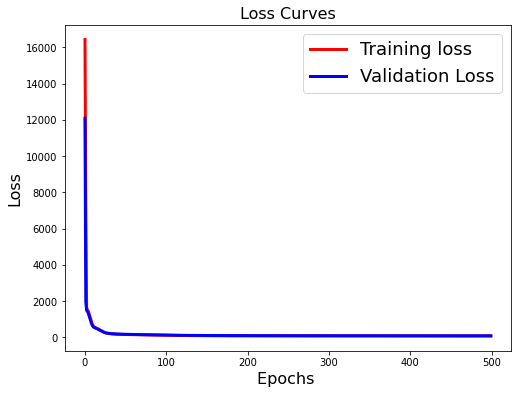

In [21]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

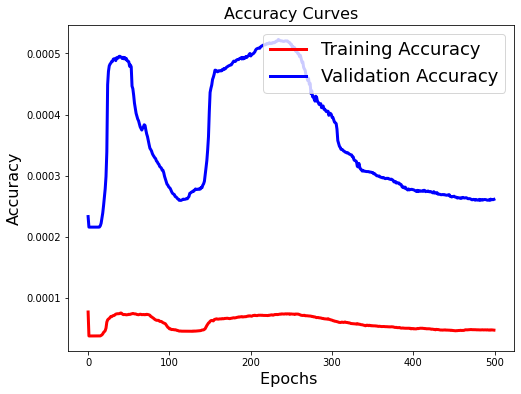

In [22]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [23]:
scores = model.evaluate(X_val, Y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 0.03%


In [24]:
model.save('wscale2.h5')

In [25]:
img_o = scipy.misc.imread('Test_data/Set5/HR/baby.png',flatten=True,mode='YCbCr').astype(np.float)
img = create_LR(img_o,2) #################################################################SCALE#################
img_size = 32
stride = 16
h,w = img.shape
piece_wise = []
for x in range(0, h-img_size+1, stride):
    for y in range (0, w-img_size+1, stride):
        sub_input = img[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1)
        piece_wise.append(sub_input)
input_ = np.asarray(piece_wise)
srcnn = load_model('best_model_improved.h5')
hat = srcnn.predict(input_)
img_re = np.zeros(img.shape)
i = 0
for x in range(0, h-img_size+1, stride):
    for y in range (0, w-img_size+1, stride):
        img_re[x:x+img_size, y:y+img_size] = hat[i].reshape(img_size,img_size)
        i += 1
cv2.imwrite('restored1.bmp', img_re)
cv2.imwrite('HR1.bmp', img_o)
img_save = (img*255).astype(np.uint8)
cv2.imwrite('blurred1.bmp',img_save)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


True

In [26]:
#CALCULATE PSNR
original = cv2.imread("HR1.bmp")
LR       = cv2.imread("blurred1.bmp")
contrast = cv2.imread("restored1.bmp",1)
def psnr(img1, img2):
    mse = np.mean((img1-img2)**2)
    if mse ==0:
        return 100
    PIXEL_MAX = 255.0
    return 20* math.log10(PIXEL_MAX / math.sqrt(mse))
d = psnr(original,contrast)
print(d)

37.168753494528545


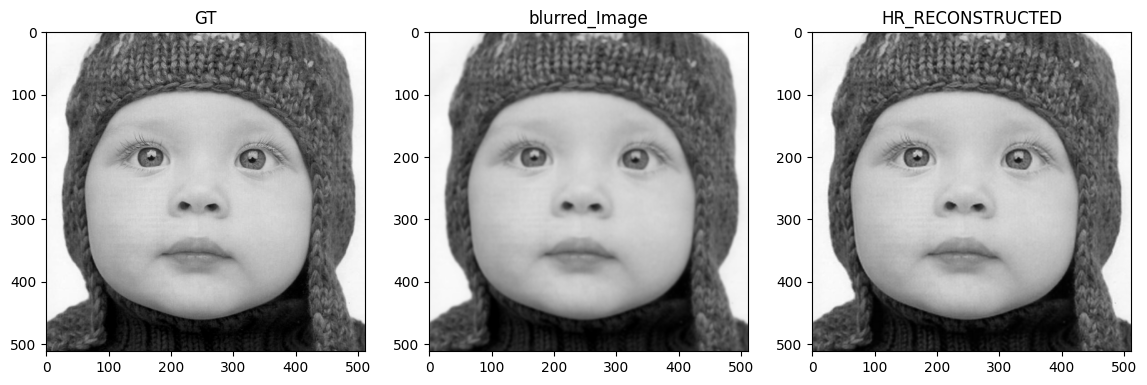

In [27]:
fig = plt.figure(figsize = (14,14), dpi = 100)
ax = plt.subplot("131")
ax.imshow(original)
ax.set_title("GT")
plt.grid(0)

ax = plt.subplot("132")
ax.imshow(LR)
ax.set_title("blurred_Image")
plt.grid(0)

ax = plt.subplot("133")
ax.imshow(contrast)
ax.set_title("HR_RECONSTRUCTED")
plt.grid(0)
plt.show()